In [50]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
mouse_drug_df
clinical_trial_df = pd.read_csv(clinical_trial_data_to_load)
clinical_trial_df
# Combine the data into a single dataset
combine_data = pd.merge(clinical_trial_df,mouse_drug_df, on = 'Mouse ID',how ='left')
#combine_data[combine_data["Mouse ID"] == 'g989']
# Display the data table for preview

combine_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


In [31]:
#objective is to analyze the data to show how four treatments (Capomulin, Infubinol, Ketapril, and Placebo) compare
new_comb_data = combine_data[(combine_data["Drug"] == 'Capomulin') |
                      (combine_data["Drug"] == 'Infubinol') |
                      (combine_data["Drug"] == 'Ketapril') |
                      (combine_data["Drug"] == 'Placebo')
                     ]
new_comb_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,f932,0,45.000000,0,Ketapril
2,g107,0,45.000000,0,Ketapril
3,a457,0,45.000000,0,Ketapril
4,c819,0,45.000000,0,Ketapril
5,h246,0,45.000000,0,Ketapril
6,p189,0,45.000000,0,Ketapril
7,n923,0,45.000000,0,Ketapril
8,q119,0,45.000000,0,Ketapril
12,y260,0,45.000000,0,Ketapril


## Tumor Response to Treatment

In [51]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
tumor_volumedata = combine_data.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)']
mean_tumorvolume = tumor_volumedata.mean()
mean_tumorvolume.head()
# Convert to DataFrame
mean_tumorvolume_df = mean_tumorvolume.reset_index()

# Preview DataFrame
mean_tumorvolume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [52]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error_tumorvolume = tumor_volumedata.sem()
standard_error_tumorvolume
# Convert to DataFrame
stnderr_tumorvolume_df = pd.DataFrame(standard_error_tumorvolume)
stnderr_tumorvolume_df.reset_index().head()

# Preview DataFrame

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [53]:
# Minor Data Munging to Re-Format the Data Frames


pivoted_avg = mean_tumorvolume_df.pivot(index='Timepoint',columns='Drug',values='Tumor Volume (mm3)')
# Preview that Reformatting worked
pivoted_avg
# in another way
tumor_vol_avg = pd.DataFrame(combine_data.groupby(['Drug','Timepoint']).mean()['Tumor Volume (mm3)'])
tumor_vol_avg = tumor_vol_avg.unstack(level = 0)
tumor_vol_avg.columns = tumor_vol_avg.columns.get_level_values(1)
# Preview that Reformatting worked
tumor_vol_avg



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [54]:
#Reshaping the standard error
tumor_vol_ste = pd.DataFrame(combine_data.groupby(['Drug','Timepoint']).sem()['Tumor Volume (mm3)'])
tumor_vol_ste = tumor_vol_ste.unstack(level = 0)
tumor_vol_ste.columns = tumor_vol_ste.columns.get_level_values(1)
# Preview that Reformatting worked
tumor_vol_ste

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


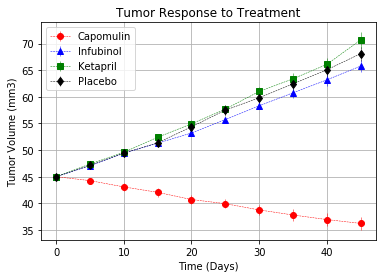

In [55]:
# Generate the Plot (with Error Bars)

plot_format_list = [('Capomulin','o','red'),('Infubinol','^','blue'),('Ketapril','s','green'),('Placebo','d','black')]
for drug,marker,colors in plot_format_list:
    ste = tumor_vol_ste[drug]

    tumor_treatment_plt = plt.errorbar(pivoted_avg.index,pivoted_avg[drug],ste,
                                      fmt=marker,ls='--',color=colors,linewidth=0.5,label=drug)    
plt.legend(loc='best')   
plt.title('Tumor Response to Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.grid()


# Save the Figure
plt.savefig("../Images/Pymaceuticals/Tumor_Response_to_Treatment.png")
plt.show()

## Metastatic Response to Treatment

In [56]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
meta_sitesdata = combine_data.groupby(['Drug','Timepoint'])['Metastatic Sites']
mean_metasite = meta_sitesdata.mean()
mean_metasite.head()
# Convert to DataFrame
mean_metasite_df = pd.DataFrame(mean_metasite)

# Preview DataFrame
mean_metasite_df .head()




Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [57]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

ste_metasite = meta_sitesdata.sem()
ste_metasite.head()
# Convert to DataFrame
ste_metasite_df = pd.DataFrame(ste_metasite)

# Preview DataFrame
ste_metasite_df.head()


Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [58]:
# Minor Data Munging to Re-Format the Data Frames for mean
meta_site_avg = pd.DataFrame(combine_data.groupby(['Drug','Timepoint']).mean()['Metastatic Sites'])
meta_site_avg = meta_site_avg.unstack(level = 0)
meta_site_avg.columns = meta_site_avg.columns.get_level_values(1)
# Preview that Reformatting worked
meta_site_avg
# Minor Data Munging to Re-Format the Data Frames for standard error
meta_site_ste = pd.DataFrame(combine_data.groupby(['Drug','Timepoint']).sem()['Metastatic Sites'])
meta_site_ste = meta_site_ste.unstack(level = 0)
meta_site_ste.columns = meta_site_ste.columns.get_level_values(1)
# Preview that Reformatting worked
meta_site_ste

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


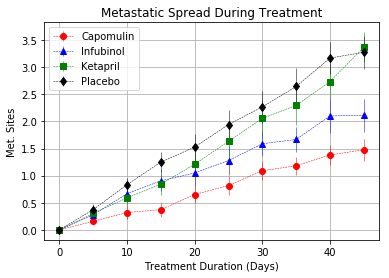

In [60]:
# Generate the Plot (with Error Bars)

plot_format_list = [('Capomulin','o','red'),('Infubinol','^','blue'),('Ketapril','s','green'),('Placebo','d','black')]
for drug,marker,colors in plot_format_list:
    ste = meta_site_ste[drug]

    metasite_treatment_plt = plt.errorbar(meta_site_avg.index,meta_site_avg[drug],ste,
                                      fmt=marker,ls='--',color=colors,linewidth=0.5,label=drug)    
plt.legend(loc='best')   
plt.title('Metastatic Spread During Treatment')
plt.xlabel('Treatment Duration (Days)')
plt.ylabel('Met. Sites')
plt.grid()


# Save the Figure
plt.savefig("../Images/Pymaceuticals/Metastatic_Spread_During_Treatment.png")
plt.show()

## Survival Rates

In [61]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
grp_micedata = combine_data.groupby(['Drug','Timepoint'])['Mouse ID']
cnt_mice = grp_micedata.nunique()
cnt_mice
# Convert to DataFrame
cnt_mice_df = pd.DataFrame(cnt_mice)
cnt_mice_df.reset_index(inplace=True)
cnt_mice_df = cnt_mice_df.rename(columns={'Mouse ID':'Mouse Count'})
cnt_mice_df
# Preview DataFrame
cnt_mice_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [62]:
# Minor Data Munging to Re-Format the Data Frames
pivoted_cnt = cnt_mice_df.pivot(index='Timepoint',columns='Drug',values='Mouse Count')
# Preview that Reformatting worked
pivoted_cnt


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,25,25,25,25
5,25,21,25,23,23,24,24,25,24,24
10,25,20,21,22,21,24,22,24,22,22
15,24,19,21,19,21,20,16,24,22,21
20,23,18,20,19,20,19,16,23,20,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


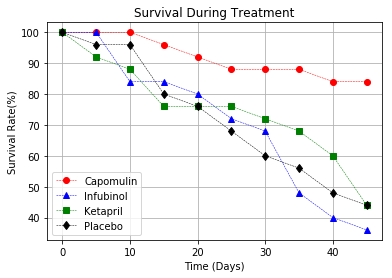

In [63]:
# Generate the Plot (Accounting for percentages)


plot_format_list = [('Capomulin','o','red'),('Infubinol','^','blue'),('Ketapril','s','green'),('Placebo','d','black')]
for drug,marker,colors in plot_format_list:
    total_mice = pivoted_cnt[drug][0]
    
    survival_rate =(pivoted_cnt[drug]/total_mice)*100
    
    survival_rates_plt = plt.plot(pivoted_cnt.index,survival_rate ,
                                    marker = marker,ls='--',color=colors,linewidth=0.5,label=drug)    
plt.legend(loc='best')   
plt.title('Survival During Treatment')
plt.xlabel('Time (Days)')
plt.ylabel('Survival Rate(%)')
plt.grid()


# Save the Figure
plt.savefig("../Images/Pymaceuticals/Survival_During_Treatment.png")
# Show the Figure
plt.show()

## Summary Bar Graph

In [64]:
pivoted_avg

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [65]:
total_change = (pivoted_avg.loc[45, :]- pivoted_avg.loc[0, :])/pivoted_avg.loc[0, :]*100
total_change
                 

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

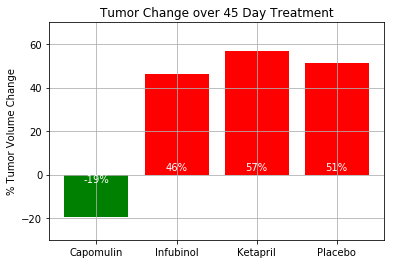

In [66]:

#  Add labels, tick marks, etc. 
drugs = ['Capomulin','Infubinol','Ketapril','Placebo']
per_change = [total_change[drug]for drug in drugs]
chng_color = color = ['red' if total_change[drug] > 0 else 'green' for drug in drugs]

per_change_chart = plt.bar(drugs, per_change, color = chng_color, align="center")
plt.grid()
plt.ylim(-30,70)
plt.ylabel('% Tumor Volume Change')
plt.title('Tumor Change over 45 Day Treatment')


# Use functions to label the percentages of changes
x_coor = 0
for change in per_change:
    if change < 0:
        y_coor = -3.5
    else:
        y_coor = 2
    plt.text(x_coor, y_coor,'%d' % int(change) + '%', ha = 'center', color = 'white')
    x_coor += 1
    
# Save the Figure
plt.savefig("../Images/Pymaceuticals/Tumor_Change_over_45_Day_Treatment.png")
# Show the Figure
plt.show()